## Optimizing the Fetal Health Classifier

The efficiency of the model may be improved by employing strategies like efficient numerics representation and efficient model representation. These strategies will optimize memory usage and training time without significantly impacting model performance.

First, I will import the original model to benchmark the model using the following metrics:
- training time
- prediction speed
- performance
- memory usage

Memory Usage: 
<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_var

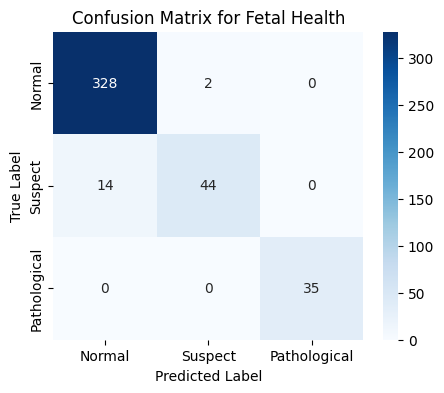

In [ ]:
# The following cell is copied and pasted from the D804_PA_Model_Fetal_Health_Classifier.ipynb notebook

# Confusion matrix plotting function
# This will help with interpretable visualizations to evalute the model
import matplotlib.pyplot as plt
import seaborn as sns

# Input arg: sklearn confusion matrix
def visualize_cm(cm):
    fig = plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Normal", "Suspect", "Pathological"],
                yticklabels=["Normal", "Suspect", "Pathological"])
    plt.title("Confusion Matrix for Fetal Health")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    return fig

# Load data
import pandas as pd
df = pd.read_csv('fetal_health.csv')

# Drop any duplicates
df.drop_duplicates(inplace=True)

# Creating dataset splits 
X = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']

print("Memory Usage: ")
print(X.info()) # to check the memory usage

from sklearn.model_selection import train_test_split
# Split using stratified sampling to address the class imbalance, and ensure that all classes are represented in training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

import time
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Initializing with the best model hyperparameters 
model = HistGradientBoostingClassifier(random_state=42, l2_regularization=np.float64(0.0070531249052700465),
                                       learning_rate=np.float64(0.0883122824824253), max_depth=6, max_iter=100,
                                       min_samples_leaf=17)

# Measure training time
train_base_start = time.time()
model.fit(X_train, y_train)
train_base_end = time.time()
print("Training time: ", train_base_end - train_base_start, " s")

# Measure prediction speed
pred_base_start = time.time()
base_preds = model.predict(X_test)
pred_base_end = time.time()
print("Prediction speed: ", pred_base_end - pred_base_start, " s")

# Performance
print("F1-Score: ", f1_score(y_test, base_preds, average='macro'))
print(classification_report(y_test, base_preds))
best_model_cm = visualize_cm(confusion_matrix(y_test, base_preds))

### Baseline Benchmarks
The baseline model yields the following benchmark metrics:
- training time: 0.40s
- prediction speed: 0.005s
- performance: F1-score of 94%
- memory usage: dataframe using 363.2KB

## Model Optimization Process

To improve the benchmarks of the current working model, I will employ the following optimization strategies:
- efficient numerics representation by changing data types
- reduce model complexity by changing hyperparameters

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float32
 1   accelerations                                           2113 non-null   float32
 2   fetal_movement                                          2113 non-null   float32
 3   uterine_contractions                                    2113 non-null   float32
 4   light_decelerations                                     2113 non-null   float32
 5   severe_decelerations                                    2113 non-null   float32
 6   prolongued_decelerations                                2113 non-null   float32
 7   abnormal_short_term_variability                         2113 non-null   float32
 8   mean_value_of_short_term_variability       

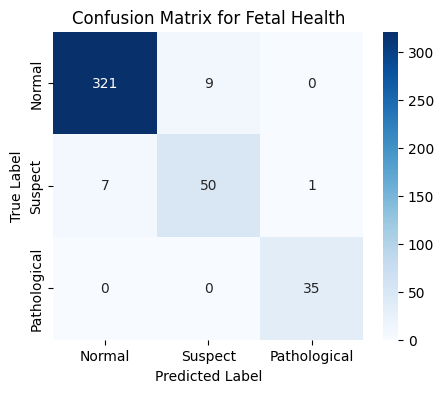

In [5]:
# Efficient numerics by changing the float64 data types into float32
X = X.astype("float32")
print(X.info()) # Check new memory usage

# Split data using memory-optimized features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Reducing model complexity 
opt_model = HistGradientBoostingClassifier(random_state=42, l2_regularization=np.float64(0.0070531249052700465),
                                       learning_rate=np.float64(0.0883122824824253), max_depth=6, min_samples_leaf=17,
                                       max_iter=30, max_bins=128, max_leaf_nodes=40, class_weight='balanced')
# Added new hyperparameters: max_bins, max_leaf_nodes, class_weight

# Measure training time
train_opt_start = time.time()
opt_model.fit(X_train, y_train)
train_opt_end = time.time()
print("Training time: ", train_opt_end - train_opt_start, " s")

# Measure prediction speed
pred_opt_start = time.time()
opt_preds = opt_model.predict(X_test)
pred_opt_end = time.time()
print("Prediction speed: ", pred_opt_end - pred_opt_start, " s")

# Performance
print("F1-Score: ", f1_score(y_test, opt_preds, average='macro'))
print(classification_report(y_test, opt_preds))
best_model_cm = visualize_cm(confusion_matrix(y_test, opt_preds))

## Model Optimization Actions
- reduce feature data type to float32
- added new hyperparameters to the model: max_bins, max_leaf_nodes, class_weight
    - max_bins: reduce the amount of bins for continuous data > faster training and less memory
    - max_leaf_nodes: prevent growing trees too large > reduce model complexity for faster training and prediction speed
    - class_weight: address class imbalance to balance model complexity reduction
- modified existing hyperparameter: max_iter
    - changes learning dynamics to train faster

## Evaluating Optimized Model
- training time: 0.12s
- prediction speed: 0.003s
- performance: F1-score of 93.8%
- memory usage: dataframe using 189.8KB

As seen by the results, the optimized model yielded much faster training and prediction speeds and decreased memory usage. Below is a comparison of before and after metrics:
- training time: 0.40s >> 0.12s
- prediction speed: 0.005s >> 0.003s
- performance: F1-score of 94% >> 93.8%
- dataframe memory: 363.2KB >> 189.8KB 

Training time, prediction speeds, and data feature memory usage are significantly better, reducing by up to a third in the case of training time and over a half in feature memory usage. The increase in efficiency while maintaining relatively similar performance (F1-Score only reduced by 0.2%, which can be negligible considering the increase in efficiency) defines the success of model optimization. Furthermore, observing the confusion matrices of the base and optimized model shows that despite the decrease in F1-score, the model is actually more accurately predicting suspect samples at the cost of extra false suspect predictions. This performance, however, is actually a valuable increase in performance as false positives are much less costly than false negatives in medical diagnosis. The false negative suspect samples reduced from 14 to 7, while maintaining 100% detection of pathological samples. This further supports model optimization.